In [70]:
# ERROR:


import re

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from ast import literal_eval
from collections import OrderedDict

%matplotlib inline

In [71]:
prep_labels = [
    'Shape', 
    'First Order', 
    'GLCM', 
    'GLRLM', 
    'GLSZM', 
    'GLDM', 
    'NGTDM', 
    'PET parameter',
    'Clinical'
]
colours = OrderedDict(
    [
        ('Shape', sns.color_palette()[0]),
        ('Clinical', sns.color_palette()[1]),
        ('First Order', sns.color_palette()[2]),
        ('GLCM', sns.color_palette()[3]),
        ('GLRLM', sns.color_palette()[8]),
        ('GLSZM', sns.color_palette()[5]),
        ('GLDM', sns.color_palette()[6]),
        ('NGTDM', sns.color_palette()[7]),
        ('PET parameter', sns.color_palette()[4])
    ]
)

In [72]:
X = pd.read_csv('./../../../data_source/to_analysis/no_filter_concat.csv', index_col=0)
features = list(X.columns)
features[:6], len(features)

(['original_shape_Elongation',
  'original_shape_Flatness',
  'original_shape_LeastAxis',
  'original_shape_MajorAxis',
  'original_shape_Maximum2DDiameterColumn',
  'original_shape_Maximum2DDiameterRow'],
 610)

In [73]:
X.filter(regex='shape').shape[1]

13

In [74]:
X.filter(regex='CT_original_firstorder').shape[1] / 3

18.0

In [75]:
X.filter(regex='CT_original').shape[1] / 3

92.0

In [77]:
results = pd.read_csv(
    './../../../data_source/results/with_pet_outliers_100evals_100reps_univariate_sffs_nofilter_dfs.csv', 
    index_col=0
)
#results = pd.read_csv('./../../../data_source/results/with_pet_outliers_60evals_40reps_univariate_sffs_nofilter_dfs.csv', index_col=0)
results.head()

,exp_id,experiment_id,DTreeEstimator__criterion,DTreeEstimator__max_depth,DTreeEstimator__max_features,DTreeEstimator__min_samples_leaf,DTreeEstimator__num_features,StudentTTestSelection__num_features,test_score,train_score,...,MutualInformationSelection__num_features,MutualInformationSelection__num_neighbors,FScoreSelection__num_features,WilcoxonSelection__num_features,ANOVAFvalueSelection__num_features,Chi2Selection__num_features,MRMRSelection__num_features,MRMRSelection__num_neighbors,ReliefFSelection__num_features,ReliefFSelection__num_neighbors
0,44,StudentTTestSelection_DTreeEstimator,entropy,3.0,sqrt,0.345551,43,52.0,0.562179,0.606391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,StudentTTestSelection_DTreeEstimator,gini,3.0,NaN,0.386659,9,20.0,0.593498,0.631660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64,StudentTTestSelection_DTreeEstimator,gini,NaN,NaN,0.458999,23,93.0,0.592491,0.636623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67,StudentTTestSelection_DTreeEstimator,gini,20.0,sqrt,0.386622,16,80.0,0.578480,0.614730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67,StudentTTestSelection_DTreeEstimator,entropy,5.0,log2,0.475743,39,46.0,0.593315,0.599581,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
results.shape

(800, 24)

In [78]:
votes = results['feature_votes']
votes.head()

0    [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...
1    [10 10 10 10 10 10 10 10  6  1  0  1  2  0  0 ...
2    [10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 ...
3    [10 10 10 10 10 10 10  8 10  9  7  7  8  7  7 ...
4    [10 10 10 10 10 10 10 10 10 10 10 10 10 10  9 ...
Name: feature_votes, dtype: object

In [79]:
len(list(votes.values[0].replace('\n', '').replace('[', '').replace(']', '').replace(' ', '')))

637

In [82]:
len(list(votes[0].replace(' ', '').replace('\n', ''))[1:-1])

637

In [91]:
# Goal:
# * Sort votes and collect corresponding labels.

global_votes = np.zeros(X.shape[1], dtype=int)
for str_array in votes:
    _votes = list(str_array.replace(' ', '').replace('\n', ''))
    votes_arr = np.array(list(map(int, list(_votes[1:-1]))), dtype=int)
    global_votes += votes_arr[:610]

idx = np.argsort(global_votes)[::-1]
labels = np.array(features)[idx]
sorted_votes = np.trim_zeros(global_votes[idx], trim='b')
labels = labels[:len(sorted_votes)]


data = pd.DataFrame(
    {
        'votes': sorted_votes,
        'labels': labels,
        
    }
)
data.head()

,votes,labels
0,1899,original_shape_Elongation
1,1517,original_shape_LeastAxis
2,1343,original_shape_Maximum2DDiameterSlice
3,1310,original_shape_Maximum2DDiameterColumn
4,1239,original_shape_MinorAxis


In [92]:
# Sanity check.
max(global_votes), sorted_votes[0]

(1899, 1899)

In [93]:
len(global_votes), len(sorted_votes)

(610, 134)

In [94]:
def prep_feature_labels(labels):
    prep_labels = []
    for label in labels:
        comps = label.split('_')

        if len(comps) == 1:
            prep_labels.append(label.title())
        elif len(comps) == 2:
            new_label = '{}: {}'.format(comps[0], comps[1])
            prep_labels.append(new_label)
        elif len(comps) == 3:
            filter_type, feature_type, name = comps
            if len(name) > 15:
                #name_comps = re.findall('[A-Z][^A-Z]*', name)
                #name = ('-\n').join((('').join(name_comps[:2]), ('').join(name_comps[2:])))
                new_label = '{}'.format(name)
            else:
                new_label = '{}'.format(name)
            prep_labels.append(new_label)
        elif len(comps) == 4:
            image_type, filter_type, feature_type, name = comps
            if len(name) > 15:
                #name_comps = re.findall('[A-Z][^A-Z]*', name)
                #name = ('-\n').join((('').join(name_comps[:2]), ('').join(name_comps[2:])))
                new_label = '\n{}'.format(name)
            else:
                new_label = '{}'.format(name)
            prep_labels.append(new_label)
            
    return prep_labels

In [95]:
def feature_labels(labels):    
    
    keys = []
    for label in labels:
        if 'shape' in label:
            keys.append('Shape')
        elif 'firstorder' in label:
            keys.append('First Order')
        elif 'glcm' in label:
            keys.append('GLCM')
        elif 'glrlm' in label:
            keys.append('GLRLM')
        elif 'glszm' in label:
            keys.append('GLSZM')
        elif 'gldm' in label:
            keys.append('GLDM')
        elif 'ngtdm' in label:
            keys.append('NGTDM')
        elif 'PETparam' in label:
            keys.append('PET parameter')
        else:
            keys.append('Clinical')

    return keys

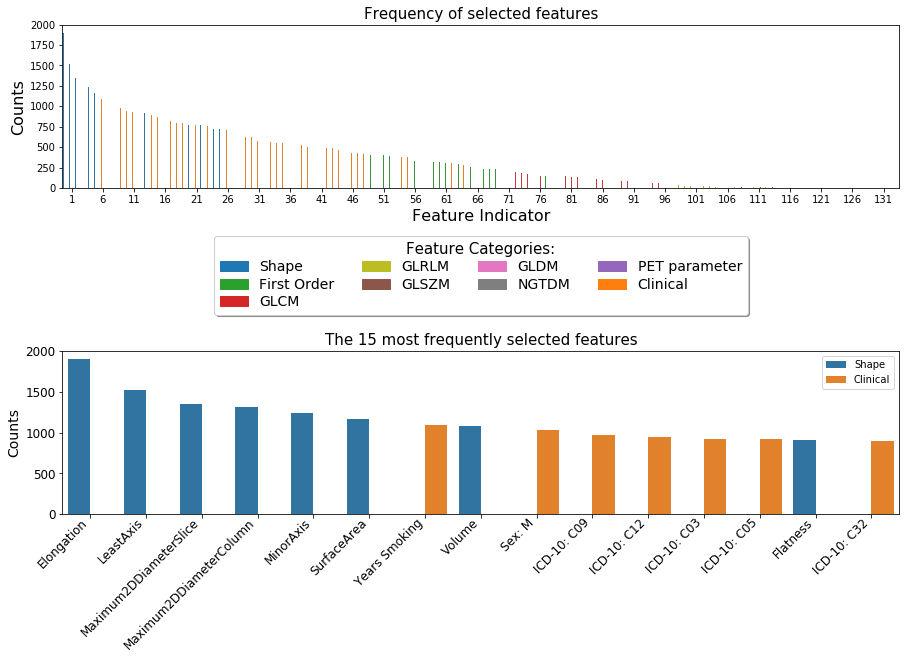

In [96]:
keys = feature_labels(labels)
handles = [
    mpatches.Patch(color=colours[key], label=key) for key in prep_labels
]

fig, axes = plt.subplots(nrows=2, figsize=(15, 9))
plt.tick_params(axis='both', labelsize=12)

sns.barplot(
    x=np.arange(np.size(sorted_votes)), 
    y=sorted_votes, 
    ax=axes[0], 
    hue=keys,
    palette=colours,
)
feature_id = np.arange(1, sorted_votes.size, 5)
axes[0].set_title('Frequency of selected features', fontsize=15)
axes[0].set_xticks(feature_id)
axes[0].set_xticklabels(feature_id)
axes[0].set_ylabel('Counts', fontsize=16)
axes[0].set_xlabel('Feature Indicator', fontsize=16)
axes[0].legend(
    handles=handles,
    title='Feature Categories:', 
    title_fontsize=15,
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.25), 
    fancybox=True, 
    shadow=True, 
    fontsize=14,
    ncol=4,
    labelspacing=0.25
)

n = 15
keys = feature_labels(labels[:n])
sns.barplot(
    x=np.arange(np.size(sorted_votes[:n])), 
    y=sorted_votes[:n], 
    ax=axes[1], 
    hue=keys,
    palette=colours,
)
fnames = prep_feature_labels(labels[:n])
#axes[1].legend().set_visible(False)
axes[1].set_title('The {} most frequently selected features'.format(n), fontsize=15)
axes[1].set_xticklabels(fnames, rotation=45, ha='right', va='center_baseline')
axes[1].set_ylabel('Counts', fontsize=14)

plt.subplots_adjust(hspace=1)

plt.savefig(
    #'./../../../figures/biomarkers_200evals_40reps.png',
    #'./../../../figures/biomarkers_60evals_40reps.png',
    './../../../figures/biomarkers_100evals_100reps.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

In [97]:
cats = ['shape',
        'firstorder',
        'glcm',
        'glrlm',
        'glszm',
        'gldm',
        'ngtdm']
res = {}
for cat in cats:
    p = 0
    c = 0
    for label in labels:
        if cat in label:
            c = c + 1
    res[cat] = c
            
res

{'shape': 13,
 'firstorder': 18,
 'glcm': 23,
 'glrlm': 16,
 'glszm': 13,
 'gldm': 9,
 'ngtdm': 0}

In [98]:
sorted_votes

array([1899, 1517, 1343, 1310, 1239, 1167, 1092, 1081, 1028,  974,  944,
        926,  919,  914,  893,  871,  840,  825,  799,  791,  772,  771,
        767,  759,  725,  724,  713,  670,  630,  626,  622,  578,  572,
        566,  549,  546,  529,  528,  528,  508,  507,  498,  494,  492,
        463,  457,  430,  426,  419,  408,  402,  402,  390,  386,  380,
        378,  334,  332,  325,  321,  315,  311,  308,  291,  278,  261,
        252,  238,  233,  228,  228,  208,  195,  182,  176,  152,  152,
        148,  147,  146,  146,  135,  134,  124,  113,  106,  105,   98,
         96,   88,   86,   80,   75,   72,   66,   63,   45,   44,   34,
         28,   28,   23,   21,   21,   19,   13,   13,   12,   11,   11,
         11,    9,    8,    8,    7,    7,    6,    5,    4,    3,    3,
          3,    3,    3,    2,    2,    1,    1,    1,    1,    1,    1,
          1,    1])

In [99]:
# NOTE: Num clinical features.
len(labels) - sum(res.values())

42

In [100]:
len(list(X.filter(regex='shape').columns))

13

In [101]:
len(list(X.filter(regex='CT').columns))

276

In [102]:
len(list(X.filter(regex='PET').columns))

279

In [103]:
nogos = list(X.filter(regex='shape').columns) 
nogos = nogos + list(X.filter(regex='CT').columns) 
nogos = nogos + list(X.filter(regex='PET').columns)

cols = {}
for num, col in enumerate(X.columns):
    if col not in nogos:
        cols[col] = sorted_votes[num]
        print(col, ':', sorted_votes[num])
        
# Pasienten er mann/kvinne er relativt viktig. Det er flere menn enn kvinner
# i datasettet. Kan være knyttet til HPV variabel fordi ikke utypisk at menn får HPV?.

# 

Age : 914
Years Smoking : 893
Naxogin Days : 871
Sex_M : 840
ICD-10_C02 : 825
ICD-10_C03 : 799
ICD-10_C04 : 791
ICD-10_C05 : 772
ICD-10_C06 : 771
ICD-10_C09 : 767
ICD-10_C10 : 759
ICD-10_C12 : 725
ICD-10_C13 : 724
ICD-10_C32 : 713
T Stage_2 : 670
T Stage_3 : 630
T Stage_4 : 626
N Stage_1 : 622
N Stage_2 : 578
N Stage_3 : 572
Histology_1.0 : 566
Histology_2.0 : 549
Histology_3.0 : 546
HPV_1 : 529
HPV_2 : 528
ECOG_1 : 528
ECOG_2 : 508
Charlson_1 : 507
Charlson_2 : 498
Charlson_3 : 494
Charlson_4 : 492
Charlson_5 : 463
Cisplatin_1 : 457
Cisplatin_2 : 430
Cisplatin_3 : 426
Cisplatin_4 : 419
Cisplatin_5 : 408
Cisplatin_6 : 402
Stage 1 : 402
Stage 2 : 390
Stage 3 : 386
Stage 4 : 380


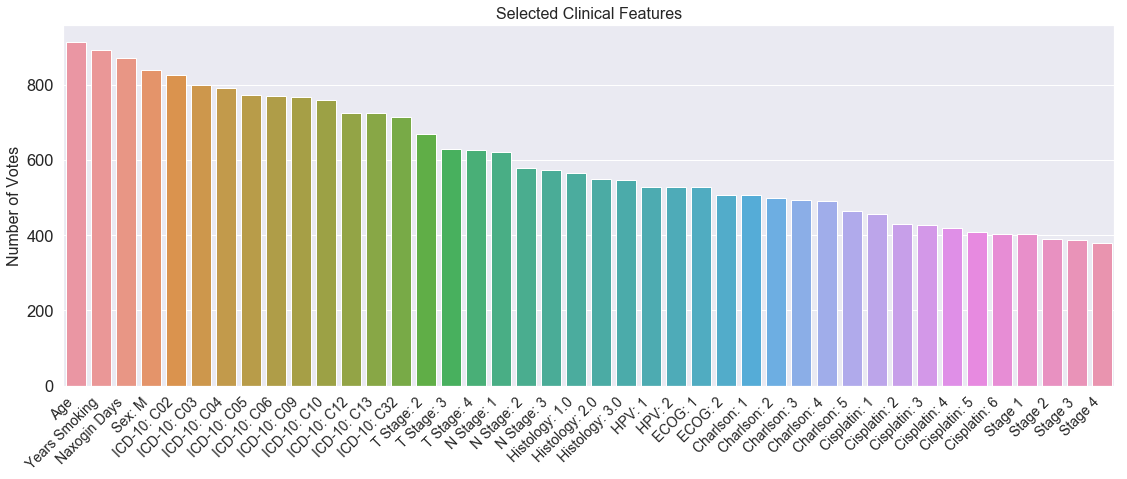

In [110]:
x_coords = np.arange(len(cols.values()))
clinical_labels = prep_feature_labels(cols.keys())

plt.figure(figsize=(16, 7))
plt.title('Selected Clinical Features', fontsize=16)
sns.barplot(x=x_coords, y=list(cols.values()))
plt.xticks(x_coords, clinical_labels, rotation=45, ha='right', fontsize=14)
plt.ylabel('Number of Votes', fontsize=16)
#plt.ylim([0, 250])
plt.tight_layout()
plt.savefig(
    #'./../../../figures/clinical_feature_biomarker.png',
    './../../../figures/clinical_feature_100evals_100reps_biomarker.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

In [105]:
# Group by encoded features.
df_clinical = pd.DataFrame.from_dict(cols, orient='index', columns=['Votes'])
df_clinical.head()

,Votes
Age,914
Years Smoking,893
Naxogin Days,871
Sex_M,840
ICD-10_C02,825


In [106]:
grouper = []
for num, label in enumerate(df_clinical.index):
    if 'ICD-10' in label:
        grouper.append('IDC-10')
    elif 'Stage' in label:
        grouper.append('Stage')
    elif 'Histology' in label:
        grouper.append('Histology')
    elif 'HPV' in label:
        grouper.append('HPV')
    elif 'ECOG' in label:
        grouper.append('ECOG')
    elif 'Charlson' in label:
        grouper.append('Charlson')
    elif 'Cisplatin' in label:
        grouper.append('Cisplatin')
    else:
        grouper.append(label)

df_clinical['groups'] = grouper

df_clinical.head()

,Votes,groups
Age,914,Age
Years Smoking,893,Years Smoking
Naxogin Days,871,Naxogin Days
Sex_M,840,Sex_M
ICD-10_C02,825,IDC-10


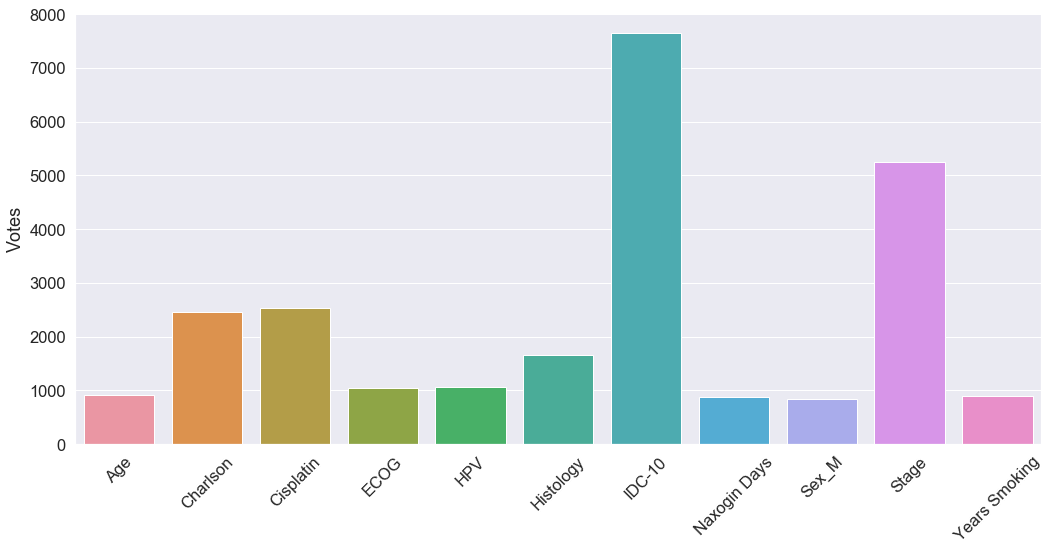

In [107]:
# Missing: 
df_clinical_grps = df_clinical.groupby('groups').sum()

plt.figure(figsize=(15, 8))
sns.set(font_scale=1.5)
sns.barplot(y='Votes', x=df_clinical_grps.index, data=df_clinical_grps)
plt.xlabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(
    #'./../../../figures/grouped_clinical_feature_biomarker.png',
    './../../../figures/grouped_100evals_100reps_clinical_feature_biomarker.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

In [109]:
np.squeeze(np.where(results['test_score'] == results['test_score'].max()))

array([471, 571])

In [108]:
idx = int(np.squeeze(np.where(results['test_score'] == results['test_score'].max())))
best_run = results.iloc[idx, :]
best_run_votes = best_run['feature_votes']
_votes = list(best_run_votes.replace(' ', '').replace('\n', ''))
votes_arr = np.array(list(map(int, list(_votes[1:-1]))), dtype=int)

idx = np.argsort(votes_arr)[::-1]
labels = np.array(features)[idx]
sorted_votes = np.trim_zeros(votes_arr[idx], trim='b')
labels = prep_feature_labels(labels[:len(sorted_votes)])

y_coords = np.arange(np.size(labels))

plt.figure(figsize=(8, 15))
sns.set(font_scale=1.5)
sns.barplot(y=labels, x=sorted_votes, )
plt.xlabel('Votes')
plt.yticks(y_coords, labels, va='bottom', fontsize=14)
plt.tight_layout()

plt.savefig(
    './../../../figures/best_run_features.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
# Group by encoded features.
df_clinical = pd.DataFrame(sorted_votes, columns=['Votes'])
df_clinical.index = labels
df_clinical.head()

In [ ]:
grouper = []
for num, label in enumerate(df_clinical.index):
    if 'ICD-10' in label:
        grouper.append('IDC-10')
    elif 'Stage' in label:
        grouper.append('Stage')
    elif 'Histology' in label:
        grouper.append('Histology')
    elif 'HPV' in label:
        grouper.append('HPV')
    elif 'ECOG' in label:
        grouper.append('ECOG')
    elif 'Charlson' in label:
        grouper.append('Charlson')
    elif 'Cisplatin' in label:
        grouper.append('Cisplatin')
    else:
        grouper.append(label)

df_clinical['groups'] = grouper

df_clinical.head()

In [ ]:
# Missing: 
df_clinical_grps = df_clinical.groupby('groups').sum()

plt.figure(figsize=(10, 15))
sns.set(font_scale=1.5)
sns.barplot(x='Votes', y=df_clinical_grps.index, data=df_clinical_grps)
plt.xlabel('Votes')
plt.ylabel('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(
    './../../../figures/grouped_best_run_features.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)